In [157]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
k = 100*(2*np.pi)**2
c = 100.0
m = 1

In [159]:
ω0 = np.sqrt(k/m)
ζ = c/(2*np.sqrt(m*k))
ωn = ω0*np.sqrt(1-ζ**2)

In [160]:
F0 = 10.

ω = 2*2*np.pi

Zm = np.sqrt((2*ω0*ζ)**2 + 1/ω**2 * (ω0**2 - ω**2)**2)

X0 = F0/(m*ω*Zm)

ϕ = np.arctan(2*ω*ω0*ζ/(ω0**2 - ω**2))

In [161]:
Δt = 0.005
ts = np.arange(0,5,Δt)

F_comp = F0*np.sin(ω*ts)

In [162]:
F_ext = np.genfromtxt('Forces.txt',skip_header=1,delimiter='\t')

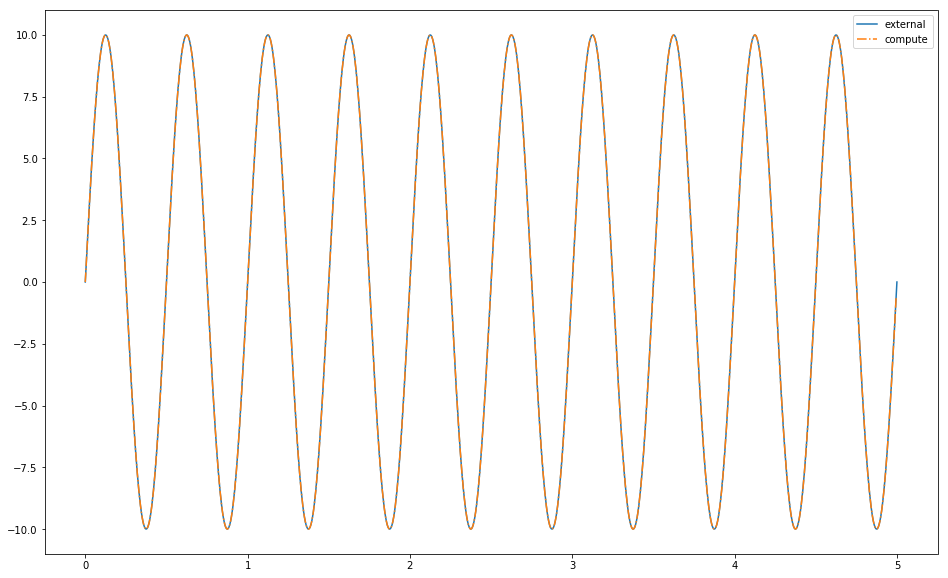

In [163]:
plt.figure(figsize=(16,10))
plt.plot(F_ext[:,0],F_ext[:,3],label='external')
plt.plot(ts,F_comp,label='compute',ls='-.')
plt.legend();

In [164]:
b_data = np.genfromtxt('spring1.mov')

In [165]:
indexes = np.unique(b_data[:,0])

steps = b_data.shape[0] // len(indexes)

bmov = {}

for ii in indexes:
    bmov[int(ii)] = np.zeros((steps,12))

    
for step in range(steps):
    for ii in indexes:
        bmov[int(ii)][step,:] = b_data[len(indexes)*step+int(ii)-1,1:]

In [166]:
t_data = np.genfromtxt('spring1.out',comments='#')[:,1:]

In [167]:
t_ext = t_data[:,1]

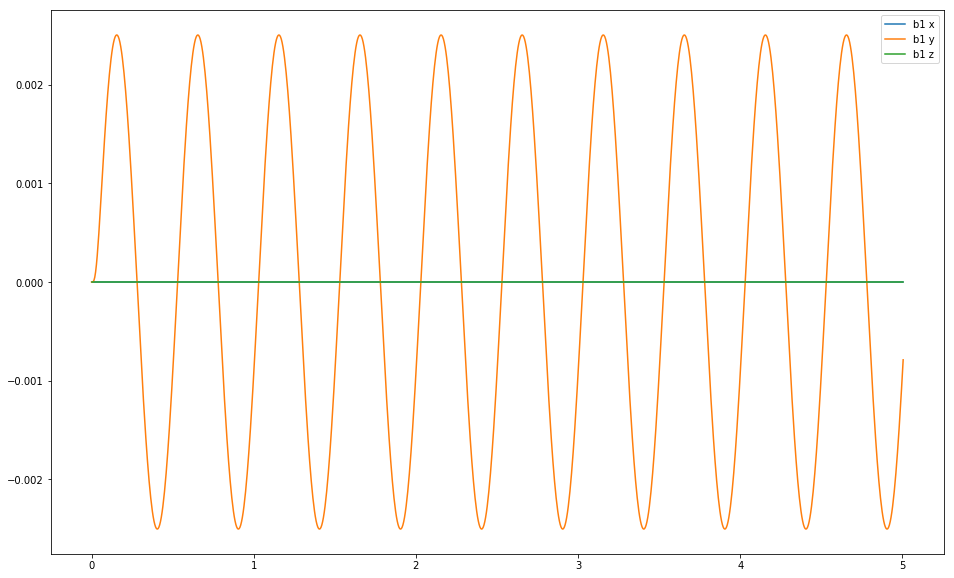

In [168]:
plt.figure(figsize=(16,10))
plt.plot(t_ext,bmov[1][:,0],label='b1 x')
plt.plot(t_ext,bmov[1][:,1],label='b1 y')
plt.plot(t_ext,bmov[1][:,2],label='b1 z')
plt.legend()

In [169]:
x_comp = X0*np.sin(ω*ts + ϕ)

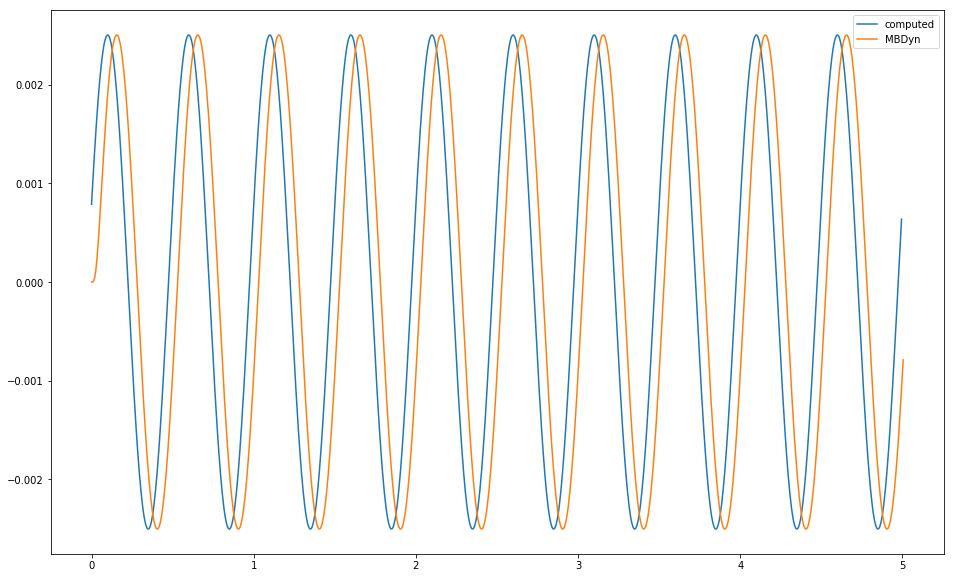

In [170]:
plt.figure(figsize=(16,10))
plt.plot(ts,x_comp,label='computed')
plt.plot(t_ext,bmov[1][:,1],label='MBDyn')
plt.legend();

In [171]:
ζ

0.7957747154594768